In [45]:
### Librerías

library(dplyr)
library(ggplot2)
library(readr)
library(readxl)
library(agricolae)
library(modeest)
library(moments)

In [2]:
datos  <- read_excel("/home/isaacmgz/Escritorio/Grupo1.xlsx")
names(datos)

[1] "MUESTRA"            "id"                 "Nombre_app"        
 [4] "tamaño_bytes"       "Paises"             "precio"            
 [7] "calificación"       "calificación-nueva" "restricción"       
[10] "género"             "disp_soporte"       "capt_pantalla"     
[13] "idiomas_sopor"

1. Construir una tabla de frecuencias para datos simples que le permita describir como es el comporta-
miento la calificación de las aplicaciones ¿qué se puede concluir?

In [3]:
#head(datos)
#tabla de frecuencias para datos simples
tdfs <- function(Variable){# Los datos deben de estar guardados en un vector
  tabla1 <- as.data.frame(table(Variable))
  tabla1 <- transform(tabla1, Ni = cumsum(Freq), fi = round(prop.table(Freq), 4))
  tabla1 <- transform(tabla1, Fi = cumsum(fi))
  tabla1
}

In [4]:
tdfs(datos$`calificación`); tdfs(datos$`calificación-nueva`)

Variable,Freq,Ni,fi,Fi
<fct>,<int>,<int>,<dbl>,<dbl>
0,1,1,0.004,0.004
2,3,4,0.012,0.016
2.5,8,12,0.032,0.048
3,29,41,0.116,0.164
3.5,61,102,0.244,0.408
4,90,192,0.360,0.768
4.5,57,249,0.228,0.996
5,1,250,0.004,1.000


Variable,Freq,Ni,fi,Fi
<fct>,<int>,<int>,<dbl>,<dbl>
0,29,29,0.116,0.116
1,3,32,0.012,0.128
1.5,1,33,0.004,0.132
2,10,43,0.040,0.172
2.5,19,62,0.076,0.248
3,11,73,0.044,0.292
3.5,19,92,0.076,0.368
4,46,138,0.184,0.552
4.5,63,201,0.252,0.804


2. Construya un gráfico con el que pueda explicar la frecuencia de las calificaciones nuevas sobre las
diferentes aplicaciones. Explique los resultados.

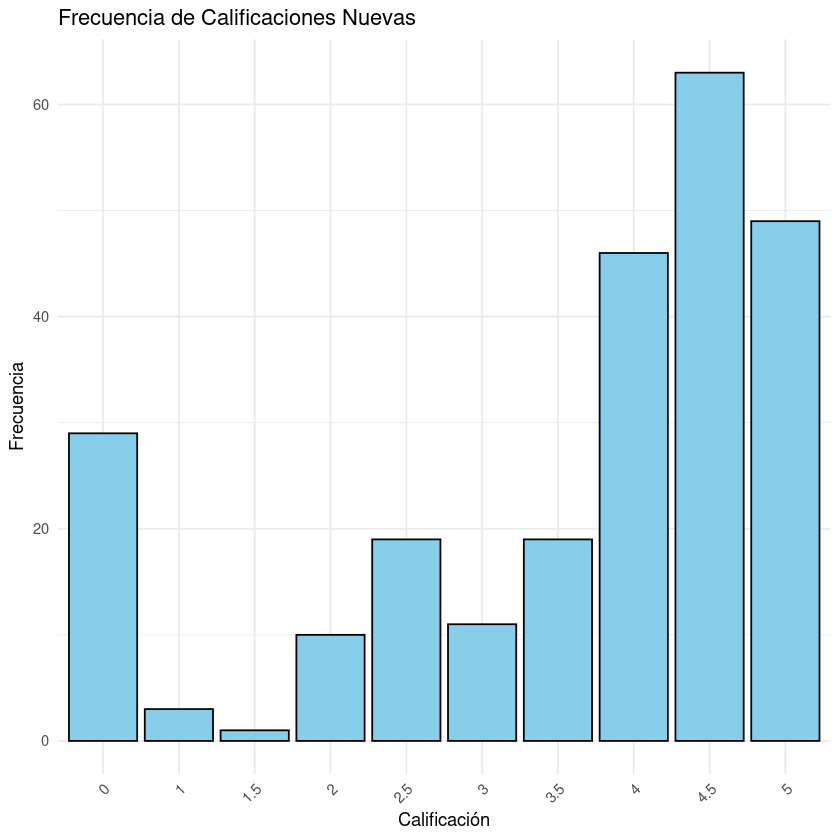

In [5]:
df  <- data.frame(
  calificacion = c(0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5),
  frecuencia = c(29, 3, 1, 10, 19, 11, 19, 46, 63, 49)
)

ggplot(df, aes(x = factor(calificacion), y = frecuencia)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Frecuencia de Calificaciones Nuevas",
       x = "Calificación",
       y = "Frecuencia") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

3. Construir una tabla de frecuencias para datos agrupados que le permita describir el tamaño de las
aplicaciones. ¿qué se puede concluir?

In [21]:
tam_b <- c(datos$`tamaño_bytes`) 

k_ <- ceiling(1 + 3.322 * log10(length(tam_b)))
ran <- max(tam_b) - min(tam_b)
amp <- ran / k_

li <- min(tam_b)
ls <- max(tam_b)

lista_tam <- hist(tam_b, breaks = k_, plot = FALSE)

tablaf  <- table.freq(lista_tam)
tablaf; lista_tam

Lower,Upper,Main,Frequency,Percentage,CF,CPF
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0e+00,1e+08,5.0e+07,153,61.2,153,61.2
1e+08,2e+08,1.5e+08,73,29.2,226,90.4
2e+08,3e+08,2.5e+08,17,6.8,243,97.2
3e+08,4e+08,3.5e+08,2,0.8,245,98.0
4e+08,5e+08,4.5e+08,1,0.4,246,98.4
5e+08,6e+08,5.5e+08,2,0.8,248,99.2
6e+08,7e+08,6.5e+08,0,0.0,248,99.2
7e+08,8e+08,7.5e+08,1,0.4,249,99.6
8e+08,9e+08,8.5e+08,1,0.4,250,100.0


$breaks
 [1] 0e+00 1e+08 2e+08 3e+08 4e+08 5e+08 6e+08 7e+08 8e+08 9e+08

$counts
[1] 153  73  17   2   1   2   0   1   1

$density
[1] 6.12e-09 2.92e-09 6.80e-10 8.00e-11 4.00e-11 8.00e-11 0.00e+00 4.00e-11
[9] 4.00e-11

$mids
[1] 5.0e+07 1.5e+08 2.5e+08 3.5e+08 4.5e+08 5.5e+08 6.5e+08 7.5e+08 8.5e+08

$xname
[1] "tam_b"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

In [40]:
tdfA <- function(y) {# Los datos deben de estar guardados en un vector
  # Calculamos el número de clases usando la fórmula de Sturge
  k <- nclass.Sturges(y)
  
  # Formamos los intervalos de clase
  intervalos <- cut(y, breaks = k)
  
  # Tabla de frecuencias absolutas
  tabla2 <- as.data.frame(table(intervalos))
  
  # Añadimos frecuencias acumuladas y frecuencias relativas
  tabla2 <- transform(tabla2, Ni = cumsum(Freq), fi = round(prop.table(Freq), 4))
  
  # Añadimos frecuencias relativas acumuladas 
  tabla2 <- transform(tabla2, Fi = cumsum(fi))
  
  # Para obtener los puntos medios de los intervalos de clase, usaremos 
  midpoints <- function(x, dp=2){
    lower <- as.numeric(gsub(',.*','',gsub('\\(|\\[|\\)|\\]','', x)))
    upper <- as.numeric(gsub('.*,','',gsub('\\(|\\[|\\)|\\]','', x)))
    return(round(lower+(upper-lower)/2, dp))
  }
  # Agregamos la columna de puntos medios de los intervalos de clase                                 
  tabla2 <- transform(tabla2, MC = midpoints(intervalos))
  
  tabla2
} 

tdfA(tam_b)

intervalos,Freq,Ni,fi,Fi,MC
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
"(-1.11e+05,9.83e+07]",152,152,0.608,0.608,49094500
"(9.83e+07,1.96e+08]",73,225,0.292,0.900,147150000
"(1.96e+08,2.93e+08]",18,243,0.072,0.972,244500000
"(2.93e+08,3.91e+08]",2,245,0.008,0.980,342000000
"(3.91e+08,4.89e+08]",1,246,0.004,0.984,440000000
"(4.89e+08,5.86e+08]",2,248,0.008,0.992,537500000
"(5.86e+08,6.84e+08]",0,248,0.000,0.992,635000000
"(6.84e+08,7.81e+08]",1,249,0.004,0.996,732500000
"(7.81e+08,8.8e+08]",1,250,0.004,1.000,830500000


4. Determine las medidas de tendencia central, de dispersión, asimetrı́a y curtosis y escriba un párrafo
donde integre la información recolectada en el contexto de la variable precio de la aplicación.

In [54]:
prec_app  <- as.numeric(datos$`precio`)

media_prec  <- mean(prec_app)
mediana_prec  <- median(prec_app)
moda_prec  <- mfv(prec_app)

cat('Media:', media_prec, ', Mediana:', mediana_prec, ', Moda:', moda_prec, '\n')

varianza_prec  <- var(prec_app)
desviacion_prec  <- sd(prec_app)
coef_dispercion_prec  <- desviacion_prec / media_prec

cat('Varianza:', varianza_prec, ', Desviación:', desviacion_prec, ', Coef Disperción:', coef_dispercion_prec, '\n')

simetria_prec <- skewness(prec_app) 
curtosis_prec <- kurtosis(prec_app) 

cat('Simetría:', simetria_prec,', Curtosis:', curtosis_prec)

Media: 3.15428 , Mediana: 0.99 , Moda: 0 
Varianza: 274.9833 , Desviación: 16.58262 , Coef Disperción: 5.257181 
Simetría: 13.60832 , Curtosis: 199.3851

5. Halle el tamaño de las aplicaciones por captura de pantallas y presente un gráfico donde se exhiba
cual es la cantidad de capturas asociadas a los mayores y menores tamaños, además determine en
cual cantidad de capturas hay mayor variabildad con respecto al tamaño de las aplicaciones.

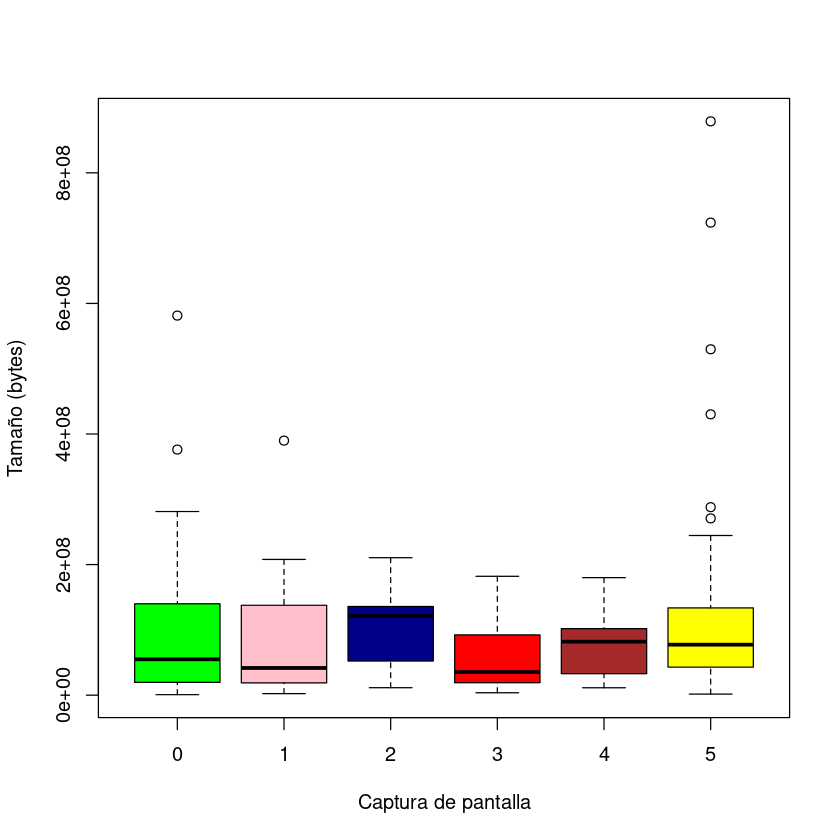

In [61]:
boxplot(datos$`tamaño_bytes` ~ datos$capt_pantalla, 
        xlab = 'Captura de pantalla', ylab='Tamaño (bytes)', col=c('green', 'pink', 'darkblue', 'red','brown', 'yellow'))

In [56]:
datos$capt_pantalla

[1] 5 0 5 5 0 5 5 4 5 1 5 5 5 2 5 0 0 4 5 0 0 5 5 5 4 5 4 3 5 5 5 0 0 5 5 5 5
 [38] 4 5 5 5 0 0 5 0 1 0 5 3 0 5 4 0 5 1 5 5 1 5 0 0 5 0 0 5 0 5 1 5 0 0 5 5 5
 [75] 5 5 5 5 5 0 4 5 5 4 1 5 5 1 0 5 0 0 0 2 5 5 4 5 0 0 0 5 5 3 3 5 5 5 3 0 0
[112] 5 4 5 1 0 5 4 5 5 5 5 0 0 0 0 4 4 0 5 0 5 0 0 5 3 1 4 5 5 0 2 5 3 0 0 0 0
[149] 5 3 5 4 5 0 5 5 0 5 5 1 0 5 0 5 5 0 5 3 5 4 0 5 4 5 5 5 4 5 5 4 5 4 0 5 5
[186] 0 5 5 5 0 0 0 3 0 5 2 0 5 3 3 4 5 3 0 0 0 0 5 0 2 5 5 5 5 0 4 1 0 0 3 0 2
[223] 1 5 0 3 5 0 5 5 5 5 0 5 4 0 5 5 5 2 5 5 4 5 2 0 5 5 4 5